In [1]:
pwd

'c:\\Users\\Admin\\Documents\\LightningHydraTEst\\lightning-hydra-template\\notebooks'

In [2]:
cd ../

c:\Users\Admin\Documents\LightningHydraTEst\lightning-hydra-template


In [83]:
import torch
from src.models.components.filter_resnet import FilterResnet
from collections import OrderedDict
import torchvision.transforms as T
from PIL import Image, ImageDraw, ImageOps
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import albumentations
import cv2
import face_recognition as fc
import albumentations.pytorch
import torch_directml
import csv
import pandas as pd
import os

In [4]:
ckpt_file = torch.load('.\outputs\weight_resnet50.pt', map_location=torch.device('cpu'))
print(ckpt_file)

{'pytorch-lightning_version': '1.9.1', 'state_dict': OrderedDict([('net.model.conv1.weight', tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-0

In [5]:
model_state_dict = ckpt_file['state_dict']
print(model_state_dict.keys())

odict_keys(['net.model.conv1.weight', 'net.model.bn1.weight', 'net.model.bn1.bias', 'net.model.bn1.running_mean', 'net.model.bn1.running_var', 'net.model.bn1.num_batches_tracked', 'net.model.layer1.0.conv1.weight', 'net.model.layer1.0.bn1.weight', 'net.model.layer1.0.bn1.bias', 'net.model.layer1.0.bn1.running_mean', 'net.model.layer1.0.bn1.running_var', 'net.model.layer1.0.bn1.num_batches_tracked', 'net.model.layer1.0.conv2.weight', 'net.model.layer1.0.bn2.weight', 'net.model.layer1.0.bn2.bias', 'net.model.layer1.0.bn2.running_mean', 'net.model.layer1.0.bn2.running_var', 'net.model.layer1.0.bn2.num_batches_tracked', 'net.model.layer1.0.conv3.weight', 'net.model.layer1.0.bn3.weight', 'net.model.layer1.0.bn3.bias', 'net.model.layer1.0.bn3.running_mean', 'net.model.layer1.0.bn3.running_var', 'net.model.layer1.0.bn3.num_batches_tracked', 'net.model.layer1.0.downsample.0.weight', 'net.model.layer1.0.downsample.1.weight', 'net.model.layer1.0.downsample.1.bias', 'net.model.layer1.0.downsample

In [6]:
model = FilterResnet(model_name='resnet50')
print(model.model.conv1.weight)

Parameter containing:
tensor([[[[-7.4457e-03, -3.1783e-03,  3.7353e-02,  ...,  4.7936e-02,
           -2.0325e-02,  8.8140e-03],
          [-5.7435e-02,  4.4709e-02,  7.7509e-02,  ...,  8.8442e-02,
            2.9346e-02, -5.8331e-02],
          [ 6.8356e-02, -2.7044e-01,  4.0348e-01,  ..., -1.6491e-01,
            2.1868e-01, -7.2909e-02],
          ...,
          [-1.0874e-01,  3.8148e-01, -4.5487e-01,  ...,  6.8366e-01,
           -5.7855e-01,  2.2461e-01],
          [ 2.5698e-02, -1.7703e-01,  6.4375e-01,  ...,  5.2644e-01,
           -4.9317e-02, -6.8082e-02],
          [ 4.5281e-02, -1.3072e-01,  1.7864e-02,  ..., -3.5753e-01,
            1.8976e-01, -2.2302e-02]],

         [[ 8.9197e-03,  4.8768e-03, -1.5356e-02,  ...,  8.6949e-02,
           -6.5541e-02,  1.6895e-02],
          [-3.3543e-02,  3.9067e-02,  8.6565e-02,  ...,  1.1713e-01,
            2.1848e-02, -4.4082e-02],
          [ 5.5285e-02, -2.6424e-01,  4.2687e-01,  ..., -2.3723e-01,
            3.2017e-01, -1.1832e-01]

In [7]:
print(model.model.state_dict().keys())

odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [8]:
def load_my_state_dict(model: torch.nn.Module, state_dict: OrderedDict):    
    own_state = model.model.state_dict()
    for name, param in state_dict.items():
        if name not in own_state:
            continue
        else:
            if param.shape == own_state[name].shape:
                own_state[name].copy_(param)
            else:
                print(name, param.shape, own_state[name].shape)

In [9]:
model_state_dict2 = OrderedDict([(key[10:], value) for key, value in model_state_dict.items()])
print(model_state_dict2)

OrderedDict([('conv1.weight', tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-01,  4.2593e-01,  ..., -2.3436e-01,
            3.2609e-01, -1.0

In [10]:
load_my_state_dict(model, model_state_dict2)
print(model.model.conv1.weight)

Parameter containing:
tensor([[[[-1.2839e-02, -9.5465e-03,  3.0479e-02,  ...,  4.5451e-02,
           -2.0939e-02,  1.1686e-02],
          [-6.1463e-02,  3.9837e-02,  7.2132e-02,  ...,  8.6506e-02,
            3.1711e-02, -5.3145e-02],
          [ 6.3612e-02, -2.7695e-01,  3.9884e-01,  ..., -1.6704e-01,
            2.2044e-01, -6.7586e-02],
          ...,
          [-1.0951e-01,  3.8017e-01, -4.5620e-01,  ...,  6.9332e-01,
           -5.7133e-01,  2.3319e-01],
          [ 2.9804e-02, -1.7453e-01,  6.4528e-01,  ...,  5.3581e-01,
           -4.1041e-02, -6.0271e-02],
          [ 5.8367e-02, -1.2274e-01,  2.6541e-02,  ..., -3.4812e-01,
            1.9881e-01, -1.1469e-02]],

         [[ 1.6377e-02,  5.0543e-03, -1.6261e-02,  ...,  8.9525e-02,
           -6.0377e-02,  2.7607e-02],
          [-3.2895e-02,  3.9980e-02,  8.6124e-02,  ...,  1.2083e-01,
            2.8723e-02, -3.4328e-02],
          [ 5.4978e-02, -2.6926e-01,  4.2593e-01,  ..., -2.3436e-01,
            3.2609e-01, -1.0966e-01]

In [11]:
class MyTransform():
  def __init__(
    self,
    transform = None,
    height = 224,
    width = 224,
    mean = (0.485, 0.456, 0.406),
    std = (0.229, 0.224, 0.225)
  ):
    if transform is not None:
      self.transform = transform
    else:
      self.transform = albumentations.Compose([
          albumentations.Resize(height = height, width = width),
          albumentations.Normalize(mean = mean, std = std),
          albumentations.pytorch.ToTensorV2()
      ])
  def __call__(self, image):
    return self.transform(image = image)['image']

In [12]:
def draw_image_with_keypoints(
    image: torch.Tensor,
    keypoints: torch.Tensor,
    width: float = None,
    height: float = None,
    normalize: bool = False
) -> None:
    assert width is not None and height is not None
    if normalize:
        width_height = torch.Tensor([width, height])
        if torch.cuda.is_available():
            width_height = width_height.cuda()
        keypoints = (keypoints + 0.5) * width_height
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)
    draw = ImageDraw.Draw(image)
    for i in range(keypoints.shape[0]):
        if keypoints[i][0] is not None and keypoints[i][1] is not None: # and keypoints[i][0] >= 0 and keypoints[i][0] <= width and keypoints[i][1] >= 0 and keypoints[i][1] <= height:
            draw.ellipse((keypoints[i][0] - 2, keypoints[i][1] - 2, keypoints[i][0] + 2, keypoints[i][1] + 2), fill = (255, 255, 0))
    return image

In [13]:
def denormalize(image: torch.Tensor, mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]):
    # 3, H, W
    for t, m, s in zip(image, mean, std):
        t.mul_(s).add_(m)
    print(image)
    return torch.clamp(image, 0, 1)

In [14]:
image_transform = MyTransform()

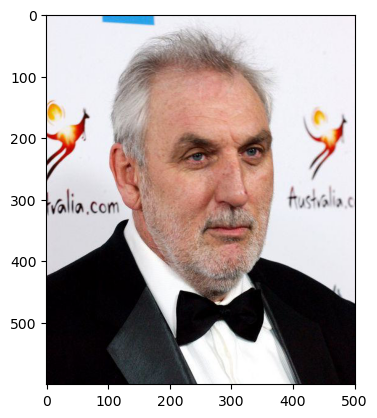

In [15]:
image = Image.open('./ibug_300W_large_face_landmark_dataset/face.jpg')
image_array = np.array(image)
plt.imshow(image)

In [16]:
face = fc.face_locations(image_array)
print(len(face))

1


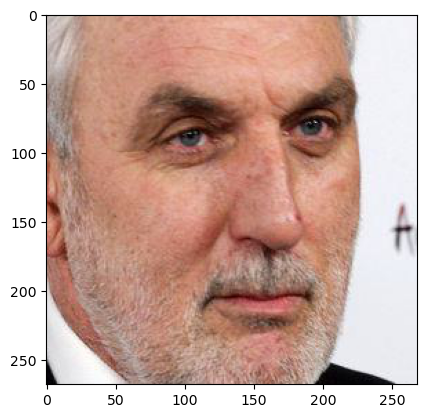

In [17]:
top, right, bottom, left = face[0]
face_location = image_array[top: bottom + 1, left: right + 1, :]
plt.imshow(face_location)

In [18]:
image_tensor = albumentations.pytorch.ToTensorV2()(image = image_array)['image']
print(image_tensor.shape)

torch.Size([3, 600, 501])


In [19]:
keypoints = torch.squeeze(model(image_transform(face_location)[None, :, :, :]))
print(keypoints.shape)

torch.Size([68, 2])


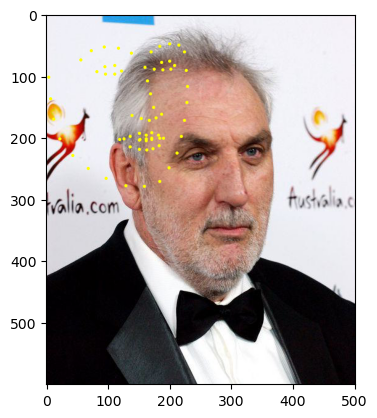

In [20]:
image_with_keypoint = draw_image_with_keypoints(
    image = Image.fromarray(image_array),
    keypoints=keypoints,
    width = face_location.shape[1],
    height = face_location.shape[0],
    normalize= True
)
plt.imshow(image_with_keypoint)

In [21]:
keypoints = (keypoints + 0.5) * torch.Tensor([face_location.shape[1], face_location.shape[0]]) + torch.Tensor([left, top])
print(keypoints.shape)

torch.Size([68, 2])


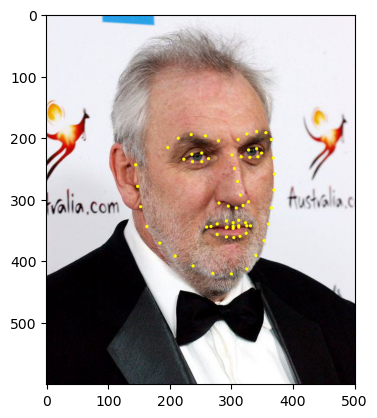

In [22]:
image_with_keypoint_full = draw_image_with_keypoints(
    image = Image.fromarray(image_array),
    keypoints=keypoints,
    width = image_array.shape[1],
    height = image_array.shape[0],
    normalize= False
)
plt.imshow(image_with_keypoint_full)

In [23]:
print(keypoints)

tensor([[145.5014, 244.2614],
        [148.8931, 279.1095],
        [153.6996, 312.6359],
        [163.5846, 344.0864],
        [184.1651, 371.5055],
        [209.9707, 392.6874],
        [238.9263, 408.1102],
        [270.4348, 420.0023],
        [300.0159, 421.1484],
        [325.6238, 413.2804],
        [340.5602, 391.4969],
        [353.2590, 367.5425],
        [360.8812, 340.7142],
        [365.6240, 314.1687],
        [369.5579, 285.6152],
        [370.6315, 259.4770],
        [368.9365, 233.5686],
        [197.1188, 216.9867],
        [214.4022, 201.9612],
        [235.5211, 195.7248],
        [258.9535, 197.9421],
        [279.9341, 205.6263],
        [311.3632, 203.2985],
        [325.8673, 194.8862],
        [341.9090, 190.2324],
        [356.6002, 192.2742],
        [365.2520, 203.1712],
        [301.2055, 228.2894],
        [305.1823, 250.3425],
        [310.0325, 271.0252],
        [315.6410, 293.5474],
        [280.9121, 306.7504],
        [295.2873, 311.2643],
        [3

In [24]:
rect = (0, 0, image_array.shape[1] - 1, image_array.shape[0] - 1)
subdiv = cv2.Subdiv2D(rect)
print(subdiv)

< cv2.Subdiv2D 000001D7857A94D0>


In [24]:
def in_rect(point, rect):
    if point[0] >= rect[0] and point[0] <= rect[2] and point[1] >= rect[1] and point[1] <= rect[3]:
        return True
    return False

In [110]:
image_array_copy = image_array.copy()

In [26]:
keypoints_array = keypoints.detach().numpy().astype(np.int32)
print(keypoints_array.shape)

(68, 2)


In [27]:
keypoints_array = keypoints_array.reshape(-1, 1, 2)
print(keypoints_array.shape)

(68, 1, 2)


In [28]:
print(keypoints_array)

[[[145 244]]

 [[148 279]]

 [[153 312]]

 [[163 344]]

 [[184 371]]

 [[209 392]]

 [[238 408]]

 [[270 420]]

 [[300 421]]

 [[325 413]]

 [[340 391]]

 [[353 367]]

 [[360 340]]

 [[365 314]]

 [[369 285]]

 [[370 259]]

 [[368 233]]

 [[197 216]]

 [[214 201]]

 [[235 195]]

 [[258 197]]

 [[279 205]]

 [[311 203]]

 [[325 194]]

 [[341 190]]

 [[356 192]]

 [[365 203]]

 [[301 228]]

 [[305 250]]

 [[310 271]]

 [[315 293]]

 [[280 306]]

 [[295 311]]

 [[308 314]]

 [[319 310]]

 [[328 304]]

 [[223 235]]

 [[236 227]]

 [[252 225]]

 [[263 234]]

 [[252 239]]

 [[237 239]]

 [[316 231]]

 [[328 220]]

 [[341 218]]

 [[349 225]]

 [[343 231]]

 [[330 232]]

 [[260 345]]

 [[277 340]]

 [[292 335]]

 [[303 338]]

 [[312 334]]

 [[323 338]]

 [[331 343]]

 [[324 355]]

 [[314 360]]

 [[304 362]]

 [[292 361]]

 [[277 357]]

 [[267 344]]

 [[293 345]]

 [[303 344]]

 [[312 343]]

 [[325 343]]

 [[312 345]]

 [[303 347]]

 [[292 346]]]


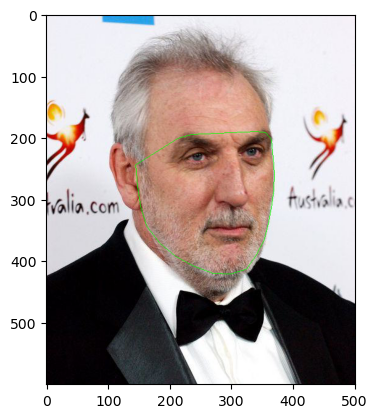

In [111]:
convexhull = cv2.convexHull(keypoints_array)
cv2.polylines(image_array_copy, [convexhull], True, (0, 255, 0), 1)
plt.imshow(image_array_copy)

In [157]:
keypoints_array = keypoints_array.squeeze()
print(keypoints_array.shape)

(68, 2)


In [112]:
mask = np.zeros(shape = image_array_copy.shape[:2], dtype = np.uint8)
print(mask.shape)

(600, 501)


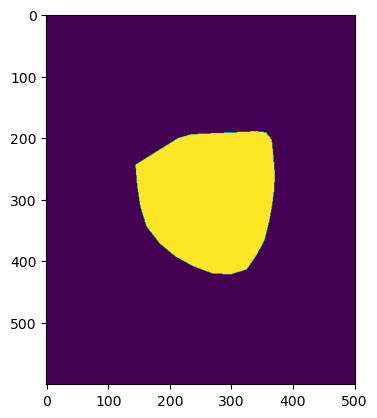

In [113]:
cv2.fillConvexPoly(mask, convexhull, 255)
plt.imshow(mask)

In [114]:
print(image_array_copy.dtype)

uint8


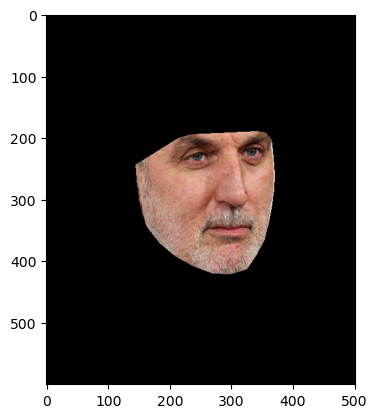

In [115]:
face_image_1 = cv2.bitwise_and(image_array, image_array, mask = mask)
plt.imshow(face_image_1)

In [153]:
image_array_copy2 = image_array.copy()
print(image_array_copy2.shape)

(600, 501, 3)


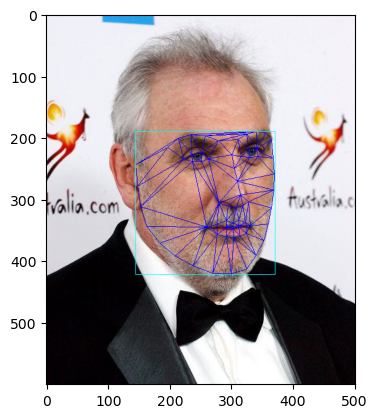

In [182]:
rect = cv2.boundingRect(convexhull)
(x, y, w, h) = rect
cv2.rectangle(image_array_copy, (x, y), (x + w, y + h), (0, 255, 255))
plt.imshow(image_array_copy)

In [64]:
rect = (0, 0, image_array_copy.shape[1], image_array_copy.shape[0])
print(rect)

(0, 0, 501, 600)


In [117]:
list_points = []
for i in range(68):
    list_points.append(((int(keypoints_array[i].squeeze()[0]), int(keypoints_array[i].squeeze()[1]))))
print(len(list_points))
print(list_points)

68
[(145, 244), (148, 279), (153, 312), (163, 344), (184, 371), (209, 392), (238, 408), (270, 420), (300, 421), (325, 413), (340, 391), (353, 367), (360, 340), (365, 314), (369, 285), (370, 259), (368, 233), (197, 216), (214, 201), (235, 195), (258, 197), (279, 205), (311, 203), (325, 194), (341, 190), (356, 192), (365, 203), (301, 228), (305, 250), (310, 271), (315, 293), (280, 306), (295, 311), (308, 314), (319, 310), (328, 304), (223, 235), (236, 227), (252, 225), (263, 234), (252, 239), (237, 239), (316, 231), (328, 220), (341, 218), (349, 225), (343, 231), (330, 232), (260, 345), (277, 340), (292, 335), (303, 338), (312, 334), (323, 338), (331, 343), (324, 355), (314, 360), (304, 362), (292, 361), (277, 357), (267, 344), (293, 345), (303, 344), (312, 343), (325, 343), (312, 345), (303, 347), (292, 346)]


In [118]:
subdiv = cv2.Subdiv2D(rect)
# for i in range(len(list_points)):
#     subdiv.insert(tuple(list_points[i]))
subdiv.insert(list_points)

In [119]:
triangles = subdiv.getTriangleList()
triangles = np.array(triangles, dtype = np.int32)
print(triangles)
print(triangles.shape)

[[197 216 148 279 145 244]
 [148 279 197 216 223 235]
 [304 362 300 421 292 361]
 [300 421 304 362 325 413]
 [263 234 310 271 280 306]
 [310 271 263 234 305 250]
 [153 312 148 279 223 235]
 [323 338 328 304 331 343]
 [328 304 323 338 319 310]
 [163 344 153 312 260 345]
 [292 335 280 306 295 311]
 [280 306 292 335 277 340]
 [184 371 163 344 260 345]
 [314 360 340 391 304 362]
 [340 391 314 360 324 355]
 [209 392 184 371 260 345]
 [292 346 292 335 293 345]
 [292 335 292 346 277 340]
 [238 408 209 392 260 345]
 [270 420 238 408 277 357]
 [369 285 310 271 370 259]
 [310 271 369 285 315 293]
 [300 421 270 420 292 361]
 [340 391 325 413 304 362]
 [353 367 340 391 324 355]
 [301 228 263 234 279 205]
 [263 234 301 228 305 250]
 [360 340 353 367 331 343]
 [252 239 236 227 252 225]
 [236 227 252 239 237 239]
 [365 314 360 340 331 343]
 [153 312 223 235 237 239]
 [369 285 365 314 328 304]
 [236 227 214 201 235 195]
 [214 201 236 227 223 235]
 [214 201 223 235 197 216]
 [368 233 370 259 343 231]
 

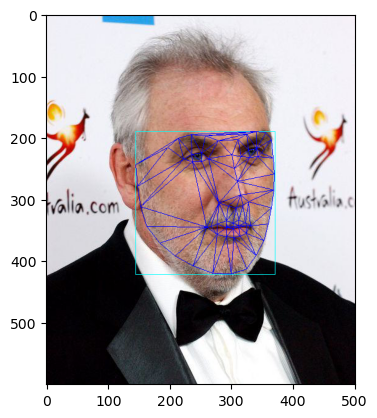

In [120]:
for triangle in triangles:

    
    point1 = (int(triangle[0]), int(triangle[1]))
    point2 = (int(triangle[2]), int(triangle[3]))
    point3 = (int(triangle[4]), int(triangle[5]))

    cv2.line(image_array_copy, point1, point2, (0, 0, 255))
    cv2.line(image_array_copy, point2, point3, (0, 0, 255))
    cv2.line(image_array_copy, point3, point1, (0, 0, 255))

plt.imshow(image_array_copy)

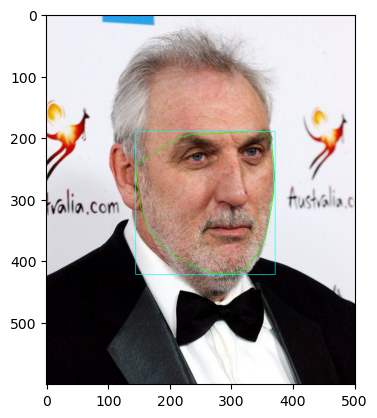

In [41]:
plt.imshow(image_array_copy)

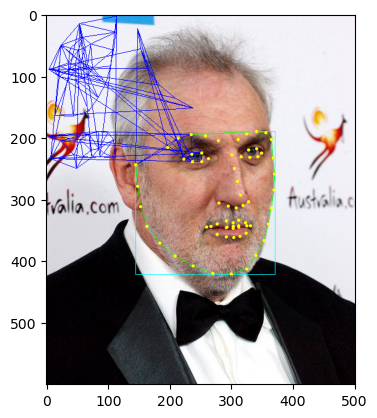

In [43]:
image_array_copy_keypoints = draw_image_with_keypoints(
    image = Image.fromarray(image_array_copy),
    keypoints = keypoints,
    width = image_array_copy.shape[1],
    height = image_array_copy.shape[0],
    normalize= False
)
plt.imshow(image_array_copy_keypoints)

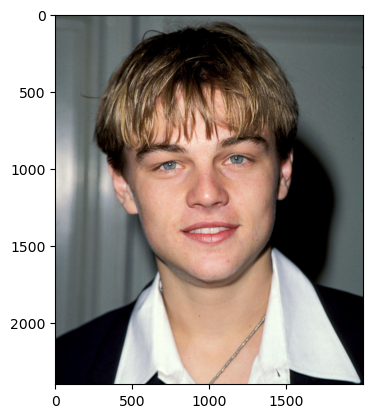

In [15]:
ld_face = Image.open('./ibug_300W_large_face_landmark_dataset/leonardo_dicarpio.jpg')
plt.imshow(ld_face)

In [16]:
ld_image_array = np.array(ld_face)
o_tensor = albumentations.pytorch.ToTensorV2()(image = ld_image_array)['image']

In [17]:
ld_faces = fc.face_locations(ld_image_array)
print(len(ld_faces))

1


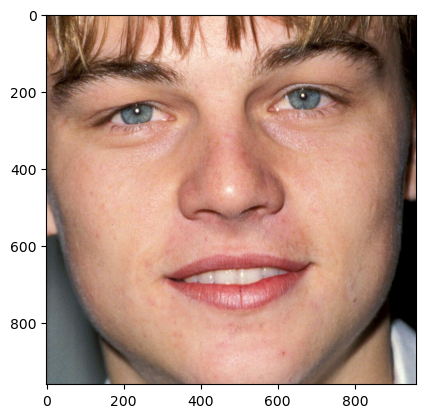

In [18]:
ld_top, ld_right, ld_bottom, ld_left = ld_faces[0]
ld_face_location = ld_image_array[ld_top: ld_bottom + 1, ld_left: ld_right + 1, :]
plt.imshow(ld_face_location)

In [19]:
ld_keypoints = torch.squeeze(model(image_transform(ld_face_location)[None, :, :, :]))
print(ld_keypoints.shape)
print(ld_keypoints)

torch.Size([68, 2])
tensor([[-0.5348, -0.1847],
        [-0.5123, -0.0569],
        [-0.4781,  0.0636],
        [-0.4433,  0.1839],
        [-0.3876,  0.2979],
        [-0.3028,  0.3834],
        [-0.2055,  0.4584],
        [-0.0883,  0.5164],
        [ 0.0490,  0.5271],
        [ 0.1798,  0.5010],
        [ 0.2885,  0.4243],
        [ 0.3753,  0.3216],
        [ 0.4341,  0.2128],
        [ 0.4548,  0.0911],
        [ 0.4601, -0.0359],
        [ 0.4710, -0.1635],
        [ 0.4640, -0.2907],
        [-0.4760, -0.2968],
        [-0.4151, -0.3671],
        [-0.3278, -0.3864],
        [-0.2354, -0.3757],
        [-0.1426, -0.3541],
        [ 0.0582, -0.3745],
        [ 0.1469, -0.4212],
        [ 0.2362, -0.4511],
        [ 0.3328, -0.4447],
        [ 0.3958, -0.3862],
        [-0.0265, -0.2619],
        [-0.0172, -0.1757],
        [-0.0063, -0.0954],
        [ 0.0049, -0.0096],
        [-0.0985,  0.0466],
        [-0.0444,  0.0580],
        [ 0.0106,  0.0693],
        [ 0.0620,  0.0512],


In [20]:
ld_keypoints = (ld_keypoints + 0.5) * torch.Tensor([ld_face_location.shape[1], ld_face_location.shape[0]]) + torch.Tensor([ld_left, ld_top])
print(ld_keypoints)

tensor([[ 476.5903, 1026.4084],
        [ 498.1634, 1148.9111],
        [ 531.0571, 1264.4952],
        [ 564.4544, 1379.8141],
        [ 617.9413, 1489.2096],
        [ 699.3276, 1571.2090],
        [ 792.7657, 1643.1516],
        [ 905.2222, 1698.7610],
        [1037.0300, 1709.0054],
        [1162.6334, 1683.9971],
        [1266.9229, 1610.3945],
        [1350.2959, 1511.9480],
        [1406.7520, 1407.5618],
        [1426.6252, 1290.8911],
        [1431.6886, 1169.0393],
        [1442.1868, 1046.7021],
        [1435.4872,  924.7559],
        [ 533.0009,  918.8975],
        [ 591.5231,  851.4732],
        [ 675.3234,  832.9128],
        [ 763.9818,  843.1764],
        [ 853.0717,  863.8975],
        [1045.8422,  844.3793],
        [1130.9968,  799.6090],
        [1216.7795,  770.9008],
        [1309.4504,  777.0706],
        [1369.9321,  833.1116],
        [ 964.5659,  952.3590],
        [ 973.4470, 1034.9764],
        [ 983.9048, 1111.9865],
        [ 994.6619, 1194.3300],
        

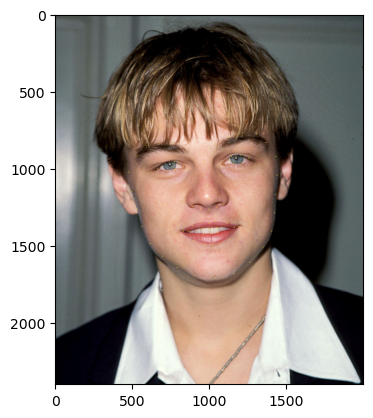

In [21]:
ld_image_keypoints = draw_image_with_keypoints(
    image = Image.fromarray(ld_image_array),
    keypoints = ld_keypoints,
    width = ld_image_array.shape[1],
    height = ld_image_array.shape[0],
    normalize = False
)
plt.imshow(ld_image_keypoints)

In [22]:
ld_keypoints_array = ld_keypoints.detach().numpy().astype(np.int32)
ld_keypoints_array = ld_keypoints_array.reshape(-1, 1, 2)
print(ld_keypoints_array.shape)

(68, 1, 2)


In [23]:
print(ld_keypoints_array)

[[[ 476 1026]]

 [[ 498 1148]]

 [[ 531 1264]]

 [[ 564 1379]]

 [[ 617 1489]]

 [[ 699 1571]]

 [[ 792 1643]]

 [[ 905 1698]]

 [[1037 1709]]

 [[1162 1683]]

 [[1266 1610]]

 [[1350 1511]]

 [[1406 1407]]

 [[1426 1290]]

 [[1431 1169]]

 [[1442 1046]]

 [[1435  924]]

 [[ 533  918]]

 [[ 591  851]]

 [[ 675  832]]

 [[ 763  843]]

 [[ 853  863]]

 [[1045  844]]

 [[1130  799]]

 [[1216  770]]

 [[1309  777]]

 [[1369  833]]

 [[ 964  952]]

 [[ 973 1034]]

 [[ 983 1111]]

 [[ 994 1194]]

 [[ 895 1248]]

 [[ 947 1259]]

 [[1000 1269]]

 [[1049 1252]]

 [[1096 1233]]

 [[ 666 1001]]

 [[ 714  968]]

 [[ 774  959]]

 [[ 833  989]]

 [[ 779 1009]]

 [[ 719 1015]]

 [[1096  965]]

 [[1144  923]]

 [[1206  914]]

 [[1258  936]]

 [[1216  961]]

 [[1156  970]]

 [[ 833 1408]]

 [[ 891 1373]]

 [[ 953 1349]]

 [[1000 1358]]

 [[1044 1342]]

 [[1118 1357]]

 [[1193 1378]]

 [[1135 1459]]

 [[1069 1488]]

 [[1021 1497]]

 [[ 971 1498]]

 [[ 902 1470]]

 [[ 866 1410]]

 [[ 957 1397]]

 [[1004 

In [24]:
ld_image_array_copy = ld_image_array.copy()

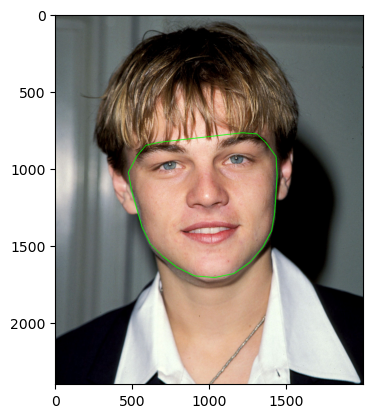

In [25]:
ld_convexhull = cv2.convexHull(ld_keypoints_array)
cv2.polylines(ld_image_array_copy, [ld_convexhull], True, (0, 255, 0), 3)
plt.imshow(ld_image_array_copy)

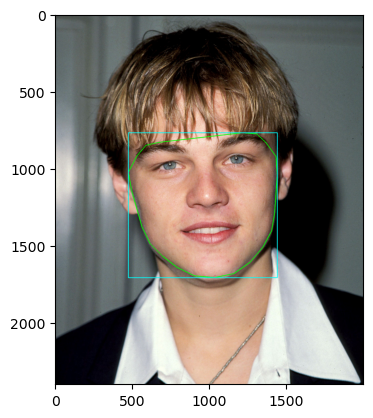

In [26]:
ld_rect = cv2.boundingRect(ld_keypoints_array)
(ld_x, ld_y, ld_w, ld_h) = ld_rect
cv2.rectangle(ld_image_array_copy, (ld_x, ld_y), (ld_x + ld_w, ld_y + ld_h), (0, 255, 255), 3)
plt.imshow(ld_image_array_copy)

In [27]:
ld_list_points = []
for i in range(68):
    ld_list_points.append(((int(ld_keypoints_array[i].squeeze()[0]), int(ld_keypoints_array[i].squeeze()[1]))))
print(len(ld_list_points))
print(ld_list_points)

68
[(476, 1026), (498, 1148), (531, 1264), (564, 1379), (617, 1489), (699, 1571), (792, 1643), (905, 1698), (1037, 1709), (1162, 1683), (1266, 1610), (1350, 1511), (1406, 1407), (1426, 1290), (1431, 1169), (1442, 1046), (1435, 924), (533, 918), (591, 851), (675, 832), (763, 843), (853, 863), (1045, 844), (1130, 799), (1216, 770), (1309, 777), (1369, 833), (964, 952), (973, 1034), (983, 1111), (994, 1194), (895, 1248), (947, 1259), (1000, 1269), (1049, 1252), (1096, 1233), (666, 1001), (714, 968), (774, 959), (833, 989), (779, 1009), (719, 1015), (1096, 965), (1144, 923), (1206, 914), (1258, 936), (1216, 961), (1156, 970), (833, 1408), (891, 1373), (953, 1349), (1000, 1358), (1044, 1342), (1118, 1357), (1193, 1378), (1135, 1459), (1069, 1488), (1021, 1497), (971, 1498), (902, 1470), (866, 1410), (957, 1397), (1004, 1395), (1050, 1390), (1166, 1385), (1059, 1420), (1012, 1427), (964, 1430)]


In [28]:
ld_points = np.array(ld_list_points, dtype = np.int32)
print(ld_points.shape)
print(ld_points)

(68, 2)
[[ 476 1026]
 [ 498 1148]
 [ 531 1264]
 [ 564 1379]
 [ 617 1489]
 [ 699 1571]
 [ 792 1643]
 [ 905 1698]
 [1037 1709]
 [1162 1683]
 [1266 1610]
 [1350 1511]
 [1406 1407]
 [1426 1290]
 [1431 1169]
 [1442 1046]
 [1435  924]
 [ 533  918]
 [ 591  851]
 [ 675  832]
 [ 763  843]
 [ 853  863]
 [1045  844]
 [1130  799]
 [1216  770]
 [1309  777]
 [1369  833]
 [ 964  952]
 [ 973 1034]
 [ 983 1111]
 [ 994 1194]
 [ 895 1248]
 [ 947 1259]
 [1000 1269]
 [1049 1252]
 [1096 1233]
 [ 666 1001]
 [ 714  968]
 [ 774  959]
 [ 833  989]
 [ 779 1009]
 [ 719 1015]
 [1096  965]
 [1144  923]
 [1206  914]
 [1258  936]
 [1216  961]
 [1156  970]
 [ 833 1408]
 [ 891 1373]
 [ 953 1349]
 [1000 1358]
 [1044 1342]
 [1118 1357]
 [1193 1378]
 [1135 1459]
 [1069 1488]
 [1021 1497]
 [ 971 1498]
 [ 902 1470]
 [ 866 1410]
 [ 957 1397]
 [1004 1395]
 [1050 1390]
 [1166 1385]
 [1059 1420]
 [1012 1427]
 [ 964 1430]]


In [74]:
ld_subdiv = cv2.Subdiv2D(ld_rect)
ld_subdiv.insert(ld_list_points)

In [30]:
ld_triangles = ld_subdiv.getTriangleList()
ld_triangles = np.array(ld_triangles, dtype = np.int32)
print(ld_triangles)

[[ 533  918  666 1001  476 1026]
 [ 666 1001  533  918  591  851]
 [1000 1358 1000 1269 1044 1342]
 [1000 1269 1000 1358  953 1349]
 [ 498 1148  476 1026  666 1001]
 [ 895 1248  891 1373  833 1408]
 [ 891 1373  895 1248  953 1349]
 [ 531 1264  498 1148  719 1015]
 [ 719 1015  498 1148  666 1001]
 [ 564 1379  531 1264  833 1408]
 [ 617 1489  833 1408  699 1571]
 [ 833 1408  617 1489  564 1379]
 [1193 1378 1096 1233 1426 1290]
 [1096 1233 1193 1378 1118 1357]
 [ 531 1264  895 1248  833 1408]
 [ 895 1248  531 1264  719 1015]
 [ 792 1643  699 1571  902 1470]
 [1206  914 1156  970 1144  923]
 [1156  970 1206  914 1216  961]
 [ 905 1698  792 1643  902 1470]
 [1096  965  983 1111  973 1034]
 [ 983 1111 1096  965 1156  970]
 [1037 1709  905 1698  971 1498]
 [1162 1683 1037 1709 1069 1488]
 [1266 1610 1162 1683 1135 1459]
 [ 714  968  779 1009  719 1015]
 [ 779 1009  714  968  774  959]
 [1350 1511 1266 1610 1135 1459]
 [ 779 1009  774  959  833  989]
 [1406 1407 1350 1511 1193 1378]
 [ 964  95

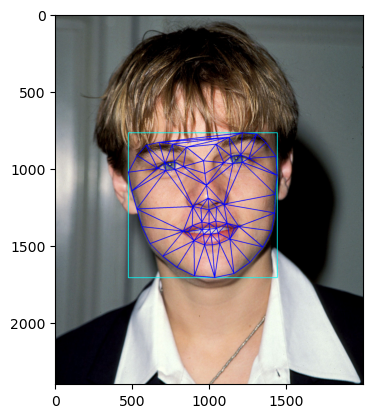

In [141]:
for ld_triangle in ld_triangles:
    ld_point1 = (ld_triangle[0], ld_triangle[1])
    ld_point2 = (ld_triangle[2], ld_triangle[3])
    ld_point3 = (ld_triangle[4], ld_triangle[5])

    cv2.line(ld_image_array_copy, ld_point1, ld_point2, (0, 0, 255), 3)
    cv2.line(ld_image_array_copy, ld_point2, ld_point3, (0, 0, 255), 3)
    cv2.line(ld_image_array_copy, ld_point3, ld_point1, (0, 0, 255), 3)

plt.imshow(ld_image_array_copy)

In [159]:
ld_image_array_copy2 = ld_image_array.copy()

In [31]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

In [152]:
index_ld_triangles = []

for ld_triangle in ld_triangles:
    ld_point1 = (ld_triangle[0], ld_triangle[1])
    ld_point2 = (ld_triangle[2], ld_triangle[3])
    ld_point3 = (ld_triangle[4], ld_triangle[5])

    index_ld_point1 = np.where((ld_points == ld_point1).all(axis = 1))
    index_ld_point1 = extract_index_nparray(index_ld_point1)

    index_ld_point2 = np.where((ld_points == ld_point2).all(axis = 1))
    index_ld_point2 = extract_index_nparray(index_ld_point2)

    index_ld_point3 = np.where((ld_points == ld_point3).all(axis = 1))
    index_ld_point3 = extract_index_nparray(index_ld_point3)

    if index_ld_point1 is not None and index_ld_point2 is not None and index_ld_point3 is not None:
        triangle = [index_ld_point1, index_ld_point2, index_ld_point3]
        index_ld_triangles.append(triangle)

print(index_ld_triangles)


[[17, 36, 0], [36, 17, 18], [51, 33, 52], [33, 51, 50], [1, 0, 36], [31, 49, 48], [49, 31, 50], [2, 1, 41], [41, 1, 36], [3, 2, 48], [4, 48, 5], [48, 4, 3], [54, 35, 13], [35, 54, 53], [2, 31, 48], [31, 2, 41], [6, 5, 59], [44, 47, 43], [47, 44, 46], [7, 6, 59], [42, 29, 28], [29, 42, 47], [8, 7, 58], [9, 8, 56], [10, 9, 55], [37, 40, 41], [40, 37, 38], [11, 10, 55], [40, 38, 39], [12, 11, 54], [27, 39, 21], [39, 27, 28], [13, 12, 54], [36, 18, 37], [14, 13, 35], [37, 18, 19], [15, 14, 46], [16, 15, 45], [46, 14, 35], [37, 20, 38], [20, 37, 19], [30, 35, 34], [35, 30, 29], [23, 20, 19], [20, 23, 21], [21, 22, 27], [22, 21, 23], [29, 47, 35], [20, 21, 38], [22, 42, 27], [42, 22, 43], [27, 42, 28], [15, 46, 45], [23, 19, 24], [22, 23, 43], [43, 23, 44], [23, 24, 44], [44, 24, 25], [26, 16, 45], [25, 26, 45], [29, 31, 40], [31, 29, 30], [35, 53, 34], [50, 31, 32], [28, 29, 39], [9, 56, 55], [58, 7, 59], [63, 52, 53], [52, 63, 51], [51, 61, 50], [61, 51, 62], [31, 30, 32], [67, 62, 66], [6

In [80]:
def find_rect(keypoints: np.array):
    convexhull = cv2.convexHull(keypoints.reshape(-1, 1, 2))
    rect = cv2.boundingRect(convexhull)
    return rect


In [84]:
def save_triangle_csv(keypoints: np.array, folder_path: str, filename: str): # keypoints.shape = [68, 2]
    rect = find_rect(keypoints)

    rows = []
    list_points = []
    keypoints = np.array(keypoints, dtype = np.int32)
    for keypoint in keypoints:
        list_points.append((int(keypoint[0]), int(keypoint[1])))

    subdiv = cv2.Subdiv2D(rect)
    subdiv.insert(list_points)
    triangles = subdiv.getTriangleList()
    triangles = np.array(triangles, dtype = np.int32)

    output_path = os.path.join(folder_path, filename + '.csv')
    with open(output_path, 'w', encoding='UTF8', newline= '') as f:
        writer = csv.writer(f)
        header = ['point1_x', 'point1_y', 'point2_x', 'point2_y', 'point3_x', 'point3_y',
                'index_point1', 'index_point2', 'index_point3', 'filename']
        writer.writerow(header)
        for triangle in triangles:
            point1 = (triangle[0], triangle[1])
            point2 = (triangle[2], triangle[3])
            point3 = (triangle[4], triangle[5])

            index_point1 = np.where((keypoints == point1).all(axis = 1))
            index_point1 = extract_index_nparray(index_point1)

            index_point2 = np.where((keypoints == point2).all(axis = 1))
            index_point2 = extract_index_nparray(index_point2)

            index_point3 = np.where((keypoints == point3).all(axis = 1))
            index_point3 = extract_index_nparray(index_point3)

            if index_point1 is not None and index_point2 is not None and index_point3 is not None:
                row = list(triangle) + [index_point1, index_point2, index_point3] + [filename + '.png']
                rows.append(row)
                writer.writerow(row)
    return rows

In [85]:
rows = save_triangle_csv(keypoints = ld_points, folder_path = './workspace/triangle_csv/', filename= 'leonardo_di_caprio')
print(rows)

[[533, 918, 666, 1001, 476, 1026, 17, 36, 0, 'leonardo_di_caprio.png'], [666, 1001, 533, 918, 591, 851, 36, 17, 18, 'leonardo_di_caprio.png'], [1000, 1358, 1000, 1269, 1044, 1342, 51, 33, 52, 'leonardo_di_caprio.png'], [1000, 1269, 1000, 1358, 953, 1349, 33, 51, 50, 'leonardo_di_caprio.png'], [498, 1148, 476, 1026, 666, 1001, 1, 0, 36, 'leonardo_di_caprio.png'], [895, 1248, 891, 1373, 833, 1408, 31, 49, 48, 'leonardo_di_caprio.png'], [891, 1373, 895, 1248, 953, 1349, 49, 31, 50, 'leonardo_di_caprio.png'], [531, 1264, 498, 1148, 719, 1015, 2, 1, 41, 'leonardo_di_caprio.png'], [719, 1015, 498, 1148, 666, 1001, 41, 1, 36, 'leonardo_di_caprio.png'], [564, 1379, 531, 1264, 833, 1408, 3, 2, 48, 'leonardo_di_caprio.png'], [617, 1489, 833, 1408, 699, 1571, 4, 48, 5, 'leonardo_di_caprio.png'], [833, 1408, 617, 1489, 564, 1379, 48, 4, 3, 'leonardo_di_caprio.png'], [1193, 1378, 1096, 1233, 1426, 1290, 54, 35, 13, 'leonardo_di_caprio.png'], [1096, 1233, 1193, 1378, 1118, 1357, 35, 54, 53, 'leonard

In [86]:
df = pd.read_csv('./workspace/triangle_csv/leonardo_di_caprio.csv')
print(df)

     point1_x  point1_y  point2_x  point2_y  point3_x  point3_y  index_point1  \
0         533       918       666      1001       476      1026            17   
1         666      1001       533       918       591       851            36   
2        1000      1358      1000      1269      1044      1342            51   
3        1000      1269      1000      1358       953      1349            33   
4         498      1148       476      1026       666      1001             1   
..        ...       ...       ...       ...       ...       ...           ...   
106       971      1498       902      1470       964      1430            58   
107       902      1470       833      1408       866      1410            59   
108       902      1470       957      1397       964      1430            59   
109      1012      1427       971      1498       964      1430            66   
110      1069      1488      1012      1427      1059      1420            56   

     index_point2  index_po

In [88]:
triangles = df[['point1_x', 'point1_y', 'point2_x', 'point2_y', 'point3_x', 'point3_y']]
triangles = np.array(triangles)
print(triangles)

[[ 533  918  666 1001  476 1026]
 [ 666 1001  533  918  591  851]
 [1000 1358 1000 1269 1044 1342]
 [1000 1269 1000 1358  953 1349]
 [ 498 1148  476 1026  666 1001]
 [ 895 1248  891 1373  833 1408]
 [ 891 1373  895 1248  953 1349]
 [ 531 1264  498 1148  719 1015]
 [ 719 1015  498 1148  666 1001]
 [ 564 1379  531 1264  833 1408]
 [ 617 1489  833 1408  699 1571]
 [ 833 1408  617 1489  564 1379]
 [1193 1378 1096 1233 1426 1290]
 [1096 1233 1193 1378 1118 1357]
 [ 531 1264  895 1248  833 1408]
 [ 895 1248  531 1264  719 1015]
 [ 792 1643  699 1571  902 1470]
 [1206  914 1156  970 1144  923]
 [1156  970 1206  914 1216  961]
 [ 905 1698  792 1643  902 1470]
 [1096  965  983 1111  973 1034]
 [ 983 1111 1096  965 1156  970]
 [1037 1709  905 1698  971 1498]
 [1162 1683 1037 1709 1069 1488]
 [1266 1610 1162 1683 1135 1459]
 [ 714  968  779 1009  719 1015]
 [ 779 1009  714  968  774  959]
 [1350 1511 1266 1610 1135 1459]
 [ 779 1009  774  959  833  989]
 [1406 1407 1350 1511 1193 1378]
 [ 964  95

In [ ]:
def get_triangle_from_csv(input_path):
    df = pd.read_csv(input_path)
    

In [63]:
header = ['index_triangle', 'idx']
num = [[1], [2], [3]]
one = [[1, 4], 3]
two = [2]
with open('./workspace/triangle_csv/leonardo_di_caprio.csv', 'w', encoding = 'UTF8', newline = '') as f:
    writer = csv.writer(f)

    writer.writerow(header)

    writer.writerow(one)



In [65]:
df = pd.read_csv('./workspace/triangle_csv/leonardo_di_caprio.csv')
print(df)
print(df.dtypes)

  index_triangle  idx
0         [1, 4]    3
index_triangle    object
idx                int64
dtype: object


In [72]:
print(df['index_triangle'].iloc[0][0])

[


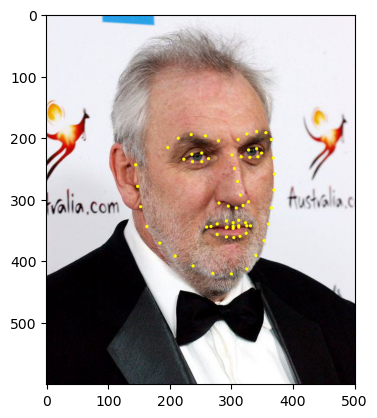

In [155]:
image_array_copy2_keypoint = draw_image_with_keypoints(
    image = Image.fromarray(image_array_copy2),
    keypoints = torch.from_numpy(keypoints_array.squeeze()),
    width = image_array_copy2.shape[1],
    height = image_array_copy2.shape[0],
    normalize = False
)
plt.imshow(image_array_copy2_keypoint)

In [161]:
image_array_copy2 = image_array.copy()

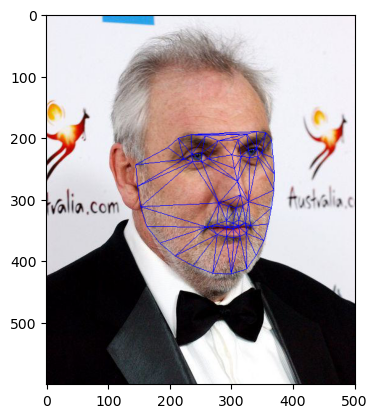

In [162]:
for triangle_index in index_ld_triangles:
    point1 = keypoints_array[triangle_index[0]]
    point2 = keypoints_array[triangle_index[1]]
    point3 = keypoints_array[triangle_index[2]]

    cv2.line(image_array_copy2, point1, point2, (0, 0, 255))
    cv2.line(image_array_copy2, point2, point3, (0, 0, 255))
    cv2.line(image_array_copy2, point3, point1, (0, 0, 255))

plt.imshow(image_array_copy2)

In [164]:
ld_image_array_copy3 = ld_image_array.copy()
print(ld_image_array_copy3.shape)
image_array_copy3 = image_array.copy()
print(image_array.shape)

(2400, 2000, 3)
(600, 501, 3)


In [166]:
image_array_copy_mask = np.zeros_like(image_array)
print(image_array_copy_mask.shape)

(600, 501, 3)


[[ 533  918]
 [ 666 1001]
 [ 476 1026]]
[[ 666 1001]
 [ 533  918]
 [ 591  851]]
[[1000 1358]
 [1000 1269]
 [1044 1342]]
[[1000 1269]
 [1000 1358]
 [ 953 1349]]
[[ 498 1148]
 [ 476 1026]
 [ 666 1001]]
[[ 895 1248]
 [ 891 1373]
 [ 833 1408]]
[[ 891 1373]
 [ 895 1248]
 [ 953 1349]]
[[ 531 1264]
 [ 498 1148]
 [ 719 1015]]
[[ 719 1015]
 [ 498 1148]
 [ 666 1001]]
[[ 564 1379]
 [ 531 1264]
 [ 833 1408]]
[[ 617 1489]
 [ 833 1408]
 [ 699 1571]]
[[ 833 1408]
 [ 617 1489]
 [ 564 1379]]
[[1193 1378]
 [1096 1233]
 [1426 1290]]
[[1096 1233]
 [1193 1378]
 [1118 1357]]
[[ 531 1264]
 [ 895 1248]
 [ 833 1408]]
[[ 895 1248]
 [ 531 1264]
 [ 719 1015]]
[[ 792 1643]
 [ 699 1571]
 [ 902 1470]]
[[1206  914]
 [1156  970]
 [1144  923]]
[[1156  970]
 [1206  914]
 [1216  961]]
[[ 905 1698]
 [ 792 1643]
 [ 902 1470]]
[[1096  965]
 [ 983 1111]
 [ 973 1034]]
[[ 983 1111]
 [1096  965]
 [1156  970]]
[[1037 1709]
 [ 905 1698]
 [ 971 1498]]
[[1162 1683]
 [1037 1709]
 [1069 1488]]
[[1266 1610]
 [1162 1683]
 [1135 1459]]


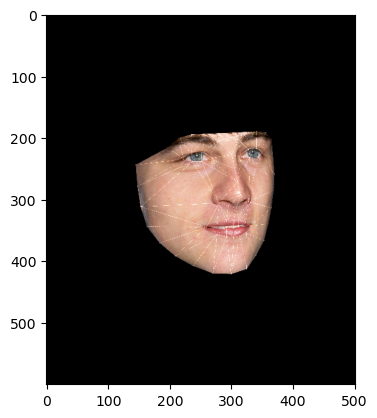

In [170]:
for index_triangle in index_ld_triangles:
    # triangulation of the ld face
    ld_triangle_point1 = ld_points[index_triangle[0]]
    ld_triangle_point2 = ld_points[index_triangle[1]]
    ld_triangle_point3 = ld_points[index_triangle[2]]
    triangle1 = np.array([ld_triangle_point1, ld_triangle_point2, ld_triangle_point3], np.int32)
    print(triangle1)
    
    rect1 = cv2.boundingRect(triangle1)
    (x, y, w, h) = rect1
    cropped_triangle1 = ld_image_array_copy3[y: y + h, x: x + w]
    cropped_triangle1_mask = np.zeros((h, w), np.uint8)

    points1 = np.array([[ld_triangle_point1[0] - x, ld_triangle_point1[1] - y],
                        [ld_triangle_point2[0] - x, ld_triangle_point2[1] - y],
                        [ld_triangle_point3[0] - x, ld_triangle_point3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_triangle1_mask, points1, 255)
    cropped_triangle1 = cv2.bitwise_and(cropped_triangle1, cropped_triangle1, mask = cropped_triangle1_mask)

    # triangulation of the second face
    triangle2_point1 = keypoints_array[index_triangle[0]]
    triangle2_point2 = keypoints_array[index_triangle[1]]
    triangle2_point3 = keypoints_array[index_triangle[2]]
    triangle2 = np.array([triangle2_point1, triangle2_point2, triangle2_point3], np.int32)

    rect2 = cv2.boundingRect(triangle2)
    (x, y, w, h) = rect2
    cropped_triangle2 = image_array_copy3[y: y + h, x: x + w]
    cropped_triangle2_mask = np.zeros((h, w), np.uint8)

    points2 = np.array([[triangle2_point1[0] - x, triangle2_point1[1] - y],
                        [triangle2_point2[0] - x, triangle2_point2[1] - y],
                        [triangle2_point3[0] - x, triangle2_point3[1] - y]], np.int32)
    cv2.fillConvexPoly(cropped_triangle2_mask, points2, 255)
    cropped_triangle2 = cv2.bitwise_and(cropped_triangle2, cropped_triangle2, mask = cropped_triangle2_mask)


    # warp triangles
    points1 = np.float32(points1)
    points2 = np.float32(points2)

    M = cv2.getAffineTransform(points1, points2)
    
    warped_triangle = cv2.warpAffine(cropped_triangle1, M, (w, h))

    # reconstruct destination face
    triangle_area = image_array_copy_mask[y: y + h, x: x + w]
    triangle_area = cv2.add(triangle_area, warped_triangle)
    image_array_copy_mask[y: y + h, x: x + w] = triangle_area

plt.imshow(image_array_copy_mask)

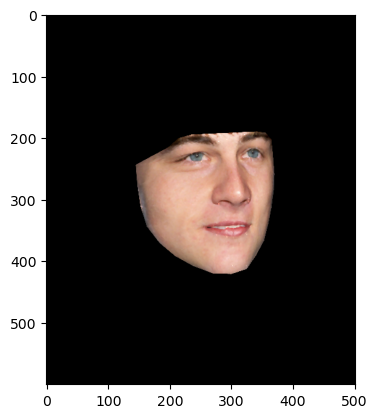

In [172]:
median = cv2.medianBlur(image_array_copy_mask, 3)
plt.imshow(median)

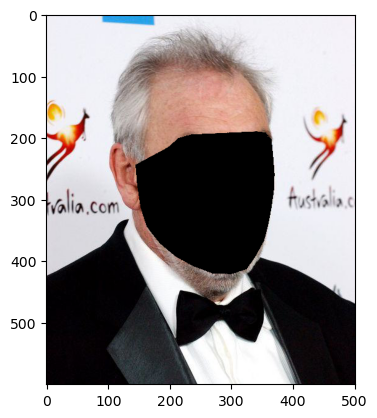

In [177]:
image_array_copy_mask_gray = cv2.cvtColor(image_array_copy_mask, cv2.COLOR_BGR2GRAY)
_, background = cv2.threshold(image_array_copy_mask_gray, 1, 255, cv2.THRESH_BINARY_INV)
background = cv2.bitwise_and(image_array_copy3, image_array_copy3, mask = background)
plt.imshow(background)

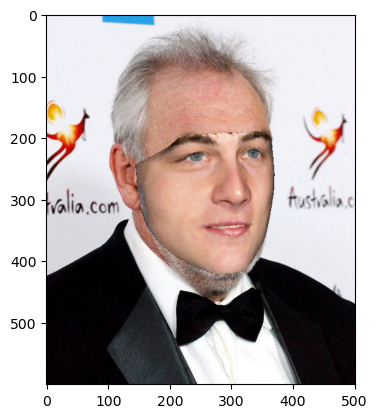

In [179]:
result = cv2.add(background, median)
plt.imshow(result)

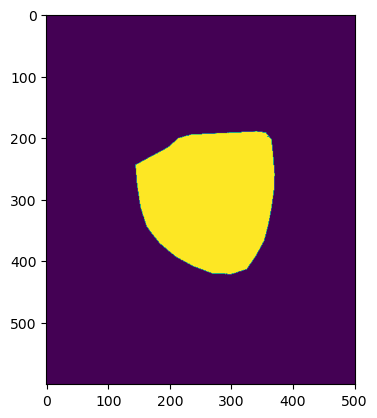

In [184]:
image_array_copy_mask_gray = cv2.cvtColor(image_array_copy_mask, cv2.COLOR_BGR2GRAY)
_, white_background = cv2.threshold(image_array_copy_mask_gray, 1, 255, cv2.THRESH_BINARY)
plt.imshow(white_background)

In [186]:
image2_center = (int(rect[0] + rect[3]/2), int(rect[1] + rect[2]/2))
print(image2_center)

(261, 303)


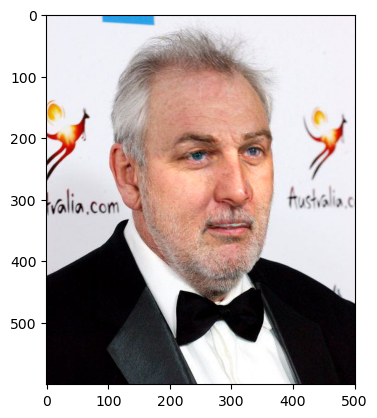

In [189]:
seamlessclone = cv2.seamlessClone(result, image_array, white_background, image2_center, cv2.MIXED_CLONE)
plt.imshow(seamlessclone)

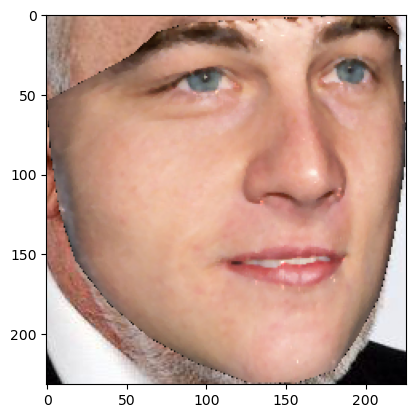

In [190]:
rect_face = result[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
plt.imshow(rect_face)

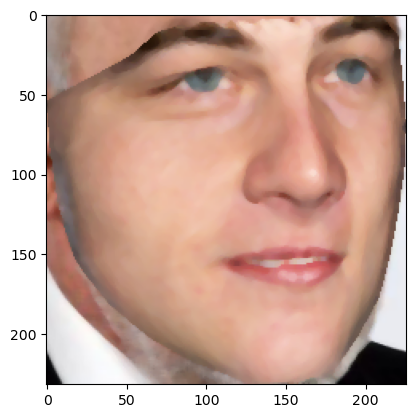

In [192]:
median_face = cv2.medianBlur(rect_face, 5)
plt.imshow(median_face)